In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.base.datetools import dates_from_str
import datetime
import pylab
import matplotlib.pyplot as plt

from IO import get_data

In [24]:
# Check whether one time series G-causes the other
#    model:
#           y_t = Sum_{j=1}^p A_{11, j} x_{t-j} + Sum_{j=1}^p A_{12, j} y_{t-j} + Error
#    inputs:
#           data: T x 3 numpy array, where T = number of time steps
#               column 1: time index
#               column 2: x_t, regressor time trend
#               column 3: y_t: dependent variable time trend
#    output:
#           logarithm of F-statistic from F-Test with null hypothesis A_{12}| = 0
def granger_causes(ndata, maxlag=2, ic=None, filelist=None, data_kept=None):
    if filelist == None:
        collist = [''] * (ndata.shape[1]-1)
    else:
        collist = map(lambda x: x.split('/')[-1][:-4].lower(), filelist)
        
    if data_kept != None:
        ndata = ndata[-data_kept:,:]
    data = pd.DataFrame(ndata[:,1:], columns=collist)
    data_without = pd.DataFrame(ndata[:,2:], columns=collist[1:])
    
    date_col = [datetime.datetime.fromtimestamp(x) for x in ndata[:,[0]]]
    dates = pd.Series(date_col)
    data.index = dates
    data_without.index = dates
    model = VAR(data)
    results = model.fit(maxlag, ic=ic)
    model_without = VAR(data_without)
    results_without = model_without.fit(maxlag, ic=ic)
    results.test_causality(list(data)[-1], list(data)[0], kind='f')
    return model, results, ndata[:,-1], model.predict(results.params)[:,-1], model_without.predict(results_without.params)[:,-1]
    

In [25]:
filelist = ["data/AAPL.csv", "data/ADI.csv"]
filelist = ["data/AAPL.csv", "data/AMZN.csv", "data/GOOG.csv", "data/ADI.csv"]
filelist = ["data/AAPL.csv", "data/MU.csv"]
filelist = ["data/AAPL.csv", "data/AMZN.csv", "data/GOOG.csv", "data/MU.csv"]
d = get_data(filelist)

Reading data/AAPL.csv
Reading data/AMZN.csv
Reading data/GOOG.csv
Reading data/MU.csv


In [43]:
model, results, predict_gt, predict_with, predict_without = granger_causes(d, filelist=filelist, maxlag=15, ic='bic', data_kept=2000)
# results.summary()

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         4.949649         3.842625            0.026  (1, 7976)
H_0: ['aapl'] do not Granger-cause mu
Conclusion: reject H_0 at 5.00% significance level


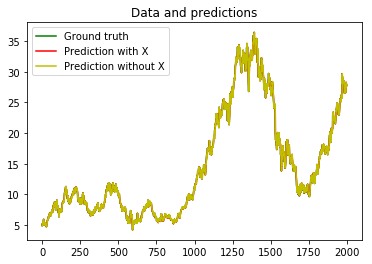

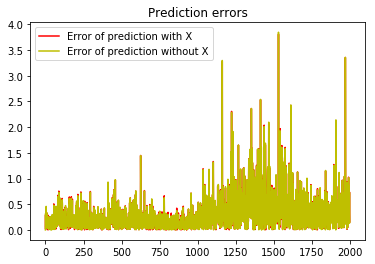

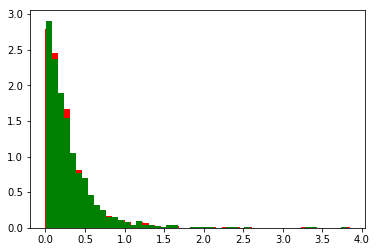

In [47]:
plt.plot(predict_gt[predict_gt.size-predict_with.size:], 'g')
plt.plot(predict_with, 'r')
plt.plot(predict_without, 'y')
plt.legend(['Ground truth', 'Prediction with X', 'Prediction without X'])
plt.title('Data and predictions')
plt.show()

errors_with = abs(predict_with-predict_gt[predict_gt.size-predict_with.size:])
errors_without = abs(predict_without-predict_gt[predict_gt.size-predict_with.size:])
plt.plot(errors_with, 'r')
plt.plot(errors_without, 'y')
plt.legend(['Error of prediction with X', 'Error of prediction without X'])
plt.title('Prediction errors')
plt.show()

plt.hist(errors_without, 50, normed=1,facecolor='red')
plt.hist(errors_with, 50, normed=1,facecolor='green')
plt.show()

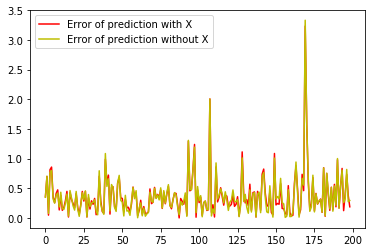

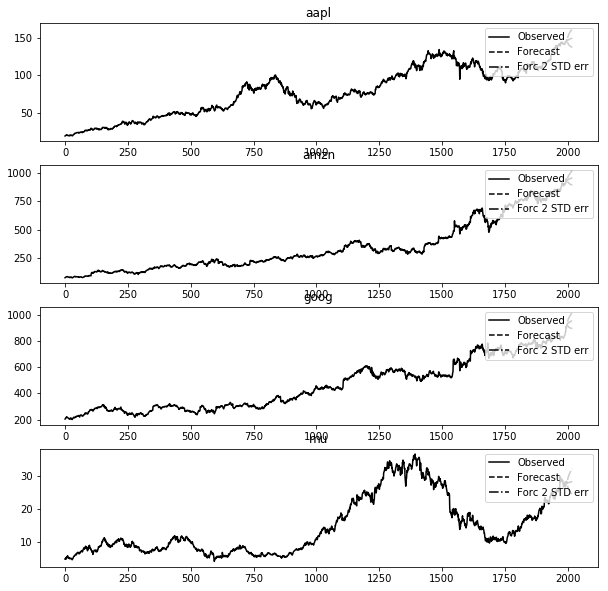

In [27]:
results.plot_forecast(20)
pylab.show()

In [106]:
mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
type(dates["quarter"])
#quarterly = dates_from_str(quarterly)

pandas.core.series.Series

In [85]:
print(quarterly)

0      1959Q1
1      1959Q2
2      1959Q3
3      1959Q4
4      1960Q1
5      1960Q2
6      1960Q3
7      1960Q4
8      1961Q1
9      1961Q2
10     1961Q3
11     1961Q4
12     1962Q1
13     1962Q2
14     1962Q3
15     1962Q4
16     1963Q1
17     1963Q2
18     1963Q3
19     1963Q4
20     1964Q1
21     1964Q2
22     1964Q3
23     1964Q4
24     1965Q1
25     1965Q2
26     1965Q3
27     1965Q4
28     1966Q1
29     1966Q2
        ...  
173    2002Q2
174    2002Q3
175    2002Q4
176    2003Q1
177    2003Q2
178    2003Q3
179    2003Q4
180    2004Q1
181    2004Q2
182    2004Q3
183    2004Q4
184    2005Q1
185    2005Q2
186    2005Q3
187    2005Q4
188    2006Q1
189    2006Q2
190    2006Q3
191    2006Q4
192    2007Q1
193    2007Q2
194    2007Q3
195    2007Q4
196    2008Q1
197    2008Q2
198    2008Q3
199    2008Q4
200    2009Q1
201    2009Q2
202    2009Q3
dtype: object
